<h1 align = "center"> Generate image dataset </h1>

The goal of this notebook is do demonstrate image dataset generation process. In this notebook we perform steps like : 

1. Get dataset from mnist 
2. Check mnist dataset
3. Generate 300x300 images from 28x28 as visual stimulus
4. Save data as .npy files in defined destination

**PS : At this moment You need about 15GB RAM to generate Dataset!**

## Import libraries

In [1]:
import os

import cv2
import numpy as np
from keras.datasets import mnist
from tqdm import tqdm
import matplotlib.pyplot as plt

import sys
sys.path.append("..")

import config
from src.data.make_dataset import generate_image_dataset
from src.data.make_dataset import save_generated_array

Using TensorFlow backend.


## Check docstrings

In [2]:
print(generate_image_dataset.__doc__)


    Generate 300x300 gray images from mnist dataset and extract images to train/test folder
    :param X: numpy images list
    :param y: numpy class list
    :param output_dir: output directory for generated images
    :return:

    


In [3]:
print(save_generated_array.__doc__)


    Save array to a binary file in numpy

    :param array: image array
    :param output_dir:  output directory
    :param output_name : name of the file

    


## Image overwiev

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print("[Image info]\n")
print(f"X_train shape : {x_train.shape}")
print(f"X_test shape : {x_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

[Image info]

X_train shape : (60000, 28, 28)
X_test shape : (10000, 28, 28)
y_train shape : (60000,)
y_test shape : (10000,)


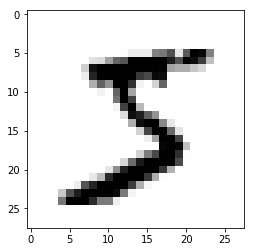

In [6]:
plt.title()
plt.imshow(x_train[0],cmap=plt.cm.binary)

# Image reshape

In [7]:
x_train = generate_image_dataset(X=x_train,
                                 width=300,
                                 height=300)

100%|██████████| 60000/60000 [00:05<00:00, 11763.73it/s]


In [8]:
x_test = generate_image_dataset(X=x_test, 
                                width=300,
                                height=300)

100%|██████████| 10000/10000 [00:00<00:00, 19814.85it/s]


In [9]:
print("[Image info]\n")
print(f"X_train shape : {x_train.shape}")
print(f"X_test shape : {x_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

[Image info]

X_train shape : (60000, 300, 300)
X_test shape : (10000, 300, 300)
y_train shape : (60000,)
y_test shape : (10000,)


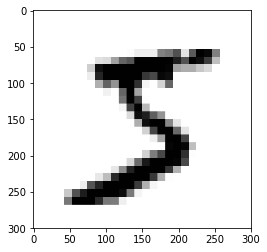

In [10]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

# Save data 

In [11]:
save_generated_array(x_train, config.PREPROCESSED_IMG_TRAIN_DIR, "X_train")
save_generated_array(y_train, config.PREPROCESSED_IMG_TRAIN_DIR, "y_train")
save_generated_array(x_test, config.PREPROCESSED_IMG_TEST_DIR, "X_test")
save_generated_array(y_test, config.PREPROCESSED_IMG_TEST_DIR, "y_test")

[X_train] numpy array was saved into /home/michal/Desktop/ML_Projects/eeg2image/data/preprocessed/IMG/train/X_train

[y_train] numpy array was saved into /home/michal/Desktop/ML_Projects/eeg2image/data/preprocessed/IMG/train/y_train

[X_test] numpy array was saved into /home/michal/Desktop/ML_Projects/eeg2image/data/preprocessed/IMG/test/X_test

[y_test] numpy array was saved into /home/michal/Desktop/ML_Projects/eeg2image/data/preprocessed/IMG/test/y_test



In [12]:
milion = 1000000000

print(f"X_train disc usage {x_train.nbytes/milion} GB")
print(f"X_test disc usage {x_test.nbytes/milion} GB")

X_train disc usage 5.4 GB
X_test disc usage 0.9 GB
